In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

In [3]:
#CARGA DE DATOS

df = pd.read_csv('METABRIC_RNA_MUTATION.csv')

C:\Users\bainf\AppData\Local\Temp\ipykernel_14640\2669571560.py:3: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('METABRIC_RNA_MUTATION.csv')


In [7]:
##columnas con la alerta

df.columns.values[[678, 688, 690, 692]]

array(['rasgef1b_mut', 'hras_mut', 'smarcb1_mut', 'siah1_mut'],
      dtype=object)

In [8]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df[['rasgef1b_mut', 'hras_mut', 'smarcb1_mut', 'siah1_mut']].dtypes

rasgef1b_mut    object
hras_mut        object
smarcb1_mut     object
siah1_mut       object
dtype: object

In [10]:
## descripcion de las variables con la alerta

df[['rasgef1b_mut', 'hras_mut', 'smarcb1_mut', 'siah1_mut']].describe()

,rasgef1b_mut,hras_mut,smarcb1_mut,siah1_mut
count,1904,1904,1904,1904
unique,9,4,4,3
top,0,0,0,0
freq,1024,1024,1024,1024


In [11]:
## las variables con la alerta indican mutaciones en los genes correspondientes. 0 = no mutacion ; x = mutacion
#hay valores de 0 como caracter

df['rasgef1b_mut'].unique()

array([0, '0', 'V418A', 'S343G', 'R140Q', 'X2_splice', 'R353H', 'H396Y',
       'E78K'], dtype=object)

In [12]:
# CONVERSION DE '0' a 0
df['rasgef1b_mut'] = df['rasgef1b_mut'].replace(['0'], 0)

In [13]:
print(df['rasgef1b_mut'].where(df['rasgef1b_mut'] == '0'))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1899    NaN
1900    NaN
1901    NaN
1902    NaN
1903    NaN
Name: rasgef1b_mut, Length: 1904, dtype: object


In [14]:
df['hras_mut'].unique()

array([0, '0', 'Q61R', 'N86T'], dtype=object)

In [15]:
df['smarcb1_mut'].unique()

array([0, '0', 'D159N', 'I28L'], dtype=object)

In [16]:
df['siah1_mut'].unique()

array([0, '0', 'T249A'], dtype=object)

In [17]:
# CONVERSION DE '0' a 0
df[['rasgef1b_mut', 'hras_mut', 'smarcb1_mut', 'siah1_mut']] = df[['rasgef1b_mut', 'hras_mut', 'smarcb1_mut', 'siah1_mut']].replace(['0'], 0)

In [18]:
df['hras_mut'].unique()

array([0, 'Q61R', 'N86T'], dtype=object)

In [19]:
df.shape 

(1904, 693)

In [20]:
df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [21]:
df.dtypes

patient_id                  int64
age_at_diagnosis          float64
type_of_breast_surgery     object
cancer_type                object
cancer_type_detailed       object
                           ...   
hras_mut                   object
prps2_mut                  object
smarcb1_mut                object
stmn2_mut                  object
siah1_mut                  object
Length: 693, dtype: object

(array([ 10.,  54., 159., 265., 315., 389., 379., 237.,  86.,  10.]),
 array([21.93 , 29.366, 36.802, 44.238, 51.674, 59.11 , 66.546, 73.982,
        81.418, 88.854, 96.29 ]),
 <BarContainer object of 10 artists>)

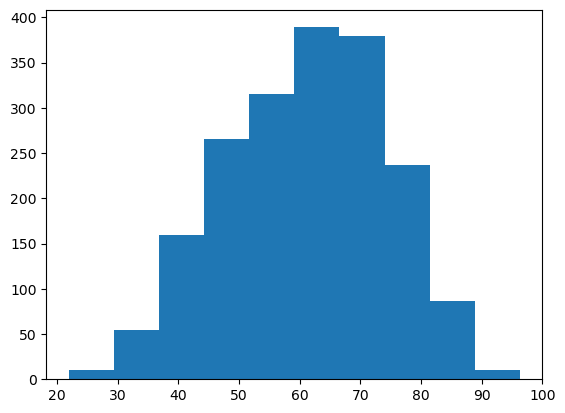

In [22]:
plt.hist(df['age_at_diagnosis'])

In [23]:
print(df.columns[2])
value_counts_2 = df.iloc[:,2].value_counts()
nan_2 = df.iloc[:,2].isna().sum()
print(value_counts_2)
print('nans:',nan_2)

type_of_breast_surgery
MASTECTOMY           1127
BREAST CONSERVING     755
Name: type_of_breast_surgery, dtype: int64
nans: 22


In [ ]:
print(df.columns[3])
value_counts_3 = df.iloc[:,3].value_counts()
nan_3 = df.iloc[:,3].isna().sum()
print(value_counts_3)
print('nans:',nan_3)

In [ ]:
print(df.columns[4])
value_counts_4 = df.iloc[:,4].value_counts()
nan_4 = df.iloc[:,4].isna().sum()
print(value_counts_4)
print('nans:',nan_4)

In [ ]:
print(df.columns[5])
value_counts_5 = df.iloc[:,5].value_counts()
nan_5 = df.iloc[:,5].isna().sum()
print(value_counts_5)
print('nans:',nan_5)

In [ ]:
print(df.columns[6])
value_counts_6 = df.iloc[:,6].value_counts()
nan_6 = df.iloc[:,6].isna().sum()
print(value_counts_6)
print('nans:',nan_6)

In [ ]:
print(df.columns[7])
value_counts_7 = df.iloc[:,7].value_counts()
nan_7 = df.iloc[:,5].isna().sum()
print(value_counts_7)
print('nans:',nan_7)

In [ ]:
print(df.columns[8])
value_counts_8 = df.iloc[:,8].value_counts()
nan_8 = df.iloc[:,8].isna().sum()
print(value_counts_8)
print('nans:',nan_8)

In [ ]:
print(df.columns[9])
value_counts_9 = df.iloc[:,9].value_counts()
nan_9 = df.iloc[:,9].isna().sum()
print(value_counts_9)
print('nans:',nan_9)

In [ ]:
print(df.columns[10])
value_counts_10 = df.iloc[:,10].value_counts()
nan_10 = df.iloc[:,10].isna().sum()
print(value_counts_10)
print('nans:',nan_10)

In [ ]:
print(df.columns[11])
value_counts_11 = df.iloc[:,11].value_counts()
nan_11 = df.iloc[:,11].isna().sum()
print(value_counts_11)
print('nans:',nan_11)

In [ ]:
print(df.columns[11])
value_counts_11 = df.iloc[:,11].value_counts()
nan_11 = df.iloc[:,11].isna().sum()
print(value_counts_10)
print('nans:',nan_10)

In [1]:
print("Hice cambios al archivo")

Hice cambios al archivo
